#### Download the file with the summary of the accommodations: [listings.csv](https://raw.githubusercontent.com/tnavarrete-iedib/bigdata-24-25/refs/heads/main/listings.csv). We are going to focus on the price per night (_price_ column).

#### 3.1. Show the boxplot of the price per night.

In [1]:
!curl -o section3.csv https://raw.githubusercontent.com/tnavarrete-iedib/bigdata-24-25/refs/heads/main/listings.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  570k  100  570k    0     0  1022k      0 --:--:-- --:--:-- --:--:-- 1023k


In [2]:
import seaborn as sns
import numpy as np
import pandas as pd

df = pd.read_csv('section3.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,44085,Villa in Addaia great sea view and fun pool,193043,Manuela,NaN,Es Mercadal,40.00974,4.19958,Entire home/apt,460.0,5,21,2024-08-25,0.14,3,0,1,ET3036ME
1,102558,appartment in Menorca -Cala Galdana,536023,Yolanda,NaN,Ciutadella de Menorca,39.94340,3.96130,Entire home/apt,121.0,3,67,2024-10-29,0.41,1,343,9,ET2253ME
2,294398,Son Esquella - Charming Menorca,312145,Sol,NaN,Alaior,39.89082,4.11595,Entire home/apt,NaN,32,11,2019-09-08,0.10,3,0,0,NaN
3,295705,The Most Perfect Villa in Menorca!,312145,Sol,NaN,Alaior,39.89028,4.11476,Entire home/apt,NaN,32,24,2022-05-30,0.16,3,0,0,NaN
4,357026,Coqueto apartamento Son Bou Menorca + Rent our...,1740878,Emilio,NaN,Alaior,39.90520,4.07072,Entire home/apt,75.0,5,83,2024-11-03,0.55,1,288,16,Licencia San Jaume Zona 5 APM-1880


<Axes: xlabel='price'>

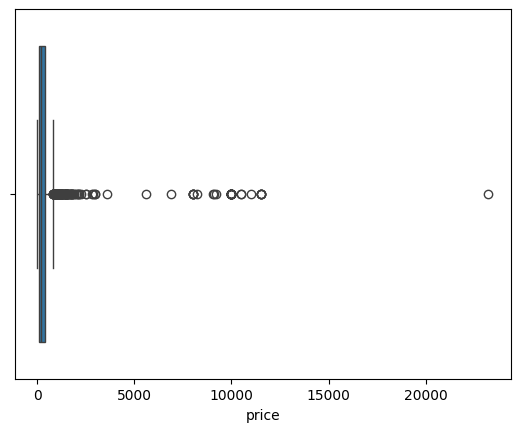

In [3]:
sns.boxplot(x=df['price'])

#### 3.2. Calculate the average price and its median. Detect the outliers and replace their values ​​with the average price you have calculated. We will consider as an outlier the one that is separated from the average by more than 2 times the standard deviation. Then, calculate the average and median again. Comment on whether they have changed and, if so, how.

In [3]:
# Calculate current mean, median, and standard deviation values with outliners
mean_price = df['price'].mean()
median_price = df['price'].median()
std_price = df['price'].std()

# Detect outliners and replace them
df_no_outliners = df.copy() # Just to keep the original dataframe
df_no_outliners['price'] = np.where((df['price'] < (mean_price - 2 * std_price)) | (df['price'] > (mean_price + 2 * std_price)), mean_price, df['price'])

# Recalculate mean and median values without outliners
new_mean_price = df_no_outliners['price'].mean()
new_median_price = df_no_outliners['price'].median()

# Print results
print(f'- Standard deviation:\t{std_price}')
print(f'- Mean:\t{mean_price}\t->\t{new_mean_price}')
print(f'- Median:\t{median_price}\t->\t{new_median_price}')

- Standard deviation:	1188.8051477663794
- Mean:	436.13595816671796	->	305.37389295355354
- Median:	192.0	->	192.0


Since mean is affected due to the addition of extream values (the outliers), median is not because it's just the central value when data is sorted. Median just gets affected when the central values of the distribution are modified.

#### 3.3. Calculate the average price (once the outliers have been replaced) per night for each of the municipalities on the island and order them from most expensive to cheapest.

In [4]:
avg_price_per_neighbourhood = df_no_outliners.groupby('neighbourhood')['price'].mean()
sorted_avg_price = avg_price_per_neighbourhood.sort_values(ascending=False)
print(f'Average price per neighbourhood: {sorted_avg_price}')

Average price per neighbourhood: neighbourhood
Es Migjorn Gran          489.257046
Ferreries                403.790431
Sant Lluís               398.284436
Mahón                    358.397254
Alaior                   298.709857
Ciutadella de Menorca    271.465242
Es Mercadal              269.029271
Es Castell               207.100000
Name: price, dtype: float64


#### Now we will also work with the detailed comments file: [reviews.csv.gz](https://github.com/tnavarrete-iedib/bigdata-24-25/raw/refs/heads/main/reviews.csv.gz)

#### 3.4. Tell which are the 10 users (_reviewer\_id_) who have written the most comments on the accommodations that have a license (_license_ column), sorted from most to least comments.

In [ ]:
!curl -L -o reviews.csv.gz https://github.com/tnavarrete-iedib/bigdata-24-25/raw/refs/heads/main/reviews.csv.gz
!gzip -d reviews.csv.gz

In [ ]:
df_reviews = pd.read_csv('reviews.csv')
df_listings = df.copy()

merged_data = df_reviews.merge(df_listings[['id', 'license']], left_on='listing_id', right_on='id') # Merged data
licensed_reviews = merged_data[merged_data['license'].notna()] # Filter data -> remove rows that don't have license

# Get the top reviewers, sort them and get top 10
top_reviewers = licensed_reviews.groupby('reviewer_id').size().reset_index(name='comment_count')
sorted_top = top_reviewers.sort_values(by='comment_count', ascending=False)
top_10 = sorted_top.head(10)

print('TOP 10 REVIEWERS:')
print(top_10)

#### 3.5. Calculate how many comments there are for each municipality on the island (you cannot use the _number\_of\_reviews_ column in the listings file, you have to calculate it from the data in the _reviews_ file). Sort them in descending order by the number of comments.

In [6]:
# Merge reviews with listings to include neighbourhood column
merged_data = df_reviews.merge(df_listings[['id', 'neighbourhood']], left_on='listing_id', right_on='id')

# Count and sort
comments_per_neighbourhood = merged_data.groupby('neighbourhood').size().reset_index(name='comment_count')
sorted_comments = comments_per_neighbourhood.sort_values(by='comment_count', ascending=False)

print('Comments per neighbourhood:')
print(sorted_comments)

Comments per neighbourhood:
           neighbourhood  comment_count
1  Ciutadella de Menorca          32756
0                 Alaior          12446
3            Es Mercadal          11876
7             Sant Lluís           9441
6                  Mahón           2990
5              Ferreries           2057
4        Es Migjorn Gran            729
2             Es Castell            717
